In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import time,datetime
from matplotlib.pyplot import figure

In [3]:
df= pd.read_csv('My_Uber_Drives.csv')

In [4]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [7]:
df=df.drop(1155)

In [8]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [9]:
df=df.rename(columns={df.columns[0]:"startdate",df.columns[1]:"enddate",df.columns[2]:"category",df.columns[3]:"start",df.columns[4]:"stop",df.columns[5]:"miles",df.columns[6]:"purpose"})

In [10]:
df

,startdate,enddate,category,start,stop,miles,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [11]:
df.isnull().sum()

startdate      0
enddate        0
category       0
start          0
stop           0
miles          0
purpose      502
dtype: int64

In [12]:
df.category.value_counts()

Business    1078
Personal      77
Name: category, dtype: int64

In [13]:
print("\n.................Average Length of the Trip.................\n")
print('Business:',round(df[df['category']=='Business'].miles.mean(),3))
print('Personal:',round(df[df['category']=='Personal'].miles.mean(),3))
print('Meal/Entertain:',round(df[df['purpose']=='Meal/Entertain'].miles.mean(),3))


.................Average Length of the Trip.................

Business: 10.656
Personal: 9.321
Meal/Entertain: 5.698


In [14]:
df.startdate = pd.to_datetime(df.startdate)
df.enddate = pd.to_datetime(df.enddate)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   startdate  1155 non-null   datetime64[ns]
 1   enddate    1155 non-null   datetime64[ns]
 2   category   1155 non-null   object        
 3   start      1155 non-null   object        
 4   stop       1155 non-null   object        
 5   miles      1155 non-null   float64       
 6   purpose    653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [16]:
df[df.start.str.contains('\?')==True]

,startdate,enddate,category,start,stop,miles,purpose
140,2016-02-20 14:50:00,2016-02-20 15:54:00,Business,R?walpindi,R?walpindi,23.1,Meeting
141,2016-02-20 16:59:00,2016-02-20 17:54:00,Personal,R?walpindi,Unknown Location,16.5,NaN
656,2016-08-15 09:05:00,2016-08-15 09:52:00,Business,R?walpindi,Unknown Location,15.6,NaN
670,2016-08-17 15:32:00,2016-08-17 15:47:00,Business,R?walpindi,Islamabad,6.4,NaN
679,2016-08-19 10:57:00,2016-08-19 11:06:00,Business,R?walpindi,Unknown Location,2.0,NaN
696,2016-08-22 20:53:00,2016-08-22 21:31:00,Business,R?walpindi,R?walpindi,4.1,NaN
697,2016-08-22 22:31:00,2016-08-22 23:00:00,Business,R?walpindi,Unknown Location,18.7,NaN
763,2016-09-19 06:18:00,2016-09-19 06:49:00,Business,R?walpindi,Unknown Location,18.2,NaN
788,2016-10-06 17:23:00,2016-10-06 17:40:00,Business,R?walpindi,Unknown Location,112.6,NaN
804,2016-10-12 19:18:00,2016-10-12 19:21:00,Business,R?walpindi,Unknown Location,18.4,NaN


In [17]:
df['start']=df['start'].replace({'\?':'a'}, regex=True)
df['stop']=df['stop'].replace({'\?':'a'}, regex=True)

In [18]:
df

,startdate,enddate,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [19]:
print("Populatar Starting Points\n.............................\n",df.start.sort_values().value_counts())

Populatar Starting Points
.............................
 Cary                 201
Unknown Location     148
Morrisville           85
Whitebridge           68
Islamabad             57
                    ... 
Flatiron District      1
Florence               1
Fuquay-Varina          1
NOMA                   1
Winston Salem          1
Name: start, Length: 175, dtype: int64


In [20]:
df.stop.sort_values().value_counts()

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
Hog Island            1
Hell's Kitchen        1
Hayesville            1
Harden Place          1
Winston Salem         1
Name: stop, Length: 186, dtype: int64

In [21]:
df['year']=df.startdate.dt.year
df['month']=df.startdate.dt.month
df['date']=df.startdate.dt.date
df['week']=df.startdate.dt.isocalendar().week
df['time']=df.startdate.dt.time
df['minutes'] = (df['enddate']-df['startdate']).dt.total_seconds()/60

In [22]:
df

,startdate,enddate,category,start,stop,miles,purpose,year,month,date,week,time,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,2016-01-01,53,21:11:00,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016,1,2016-01-02,53,01:25:00,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2016-01-02,53,20:25:00,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,2016-01-05,1,17:31:00,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,1,2016-01-06,1,14:42:00,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,2016,12,2016-12-31,52,01:07:00,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,2016,12,2016-12-31,52,13:24:00,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016,12,2016-12-31,52,15:03:00,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016,12,2016-12-31,52,21:32:00,18.0


Text(0, 0.5, 'Counts')

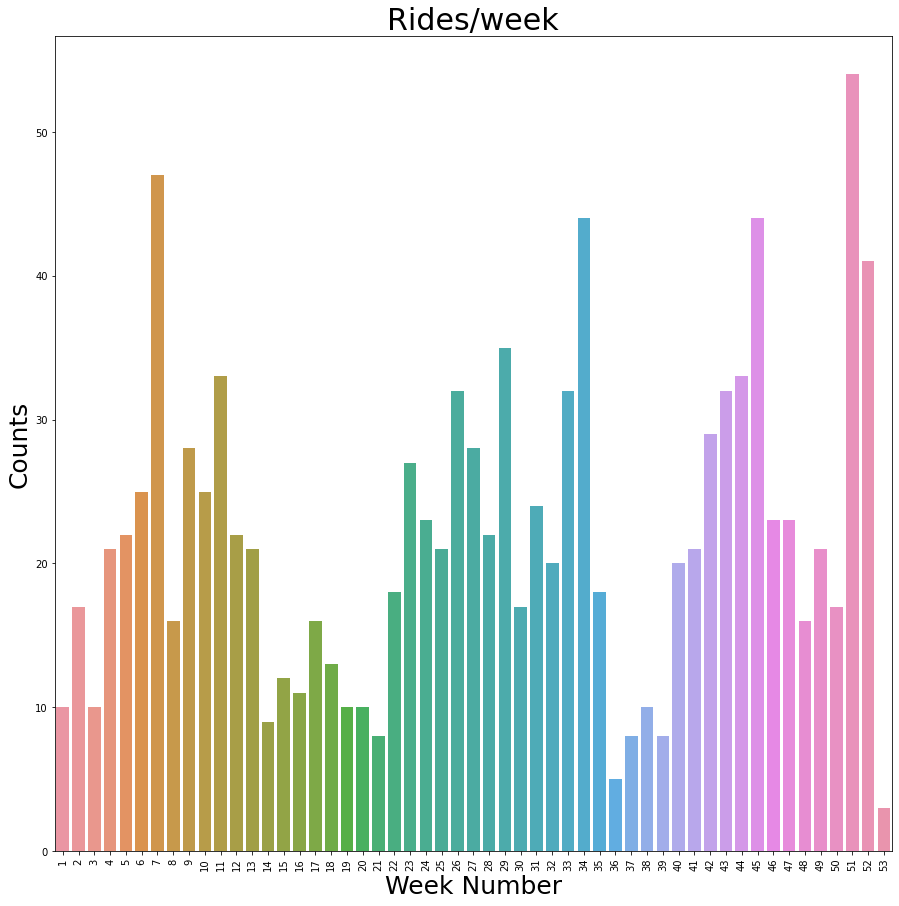

In [23]:
fig_dims = (15,15)
fig, ax = plt.subplots(figsize=fig_dims)
cont = sns.countplot(x='week',ax=ax,data=df)
pl =plt.setp(cont.get_xticklabels(),rotation=90)
plt.title('Rides/week',fontsize=30)
plt.xlabel('Week Number',fontsize=25)
plt.ylabel('Counts', fontsize=25)

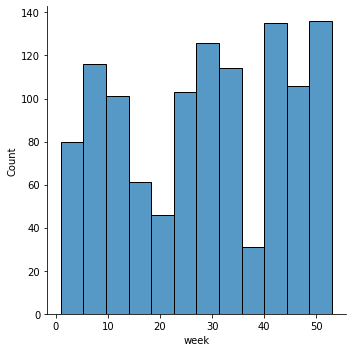

In [24]:
sns.displot(df["week"])

<AxesSubplot:xlabel='time', ylabel='count'>

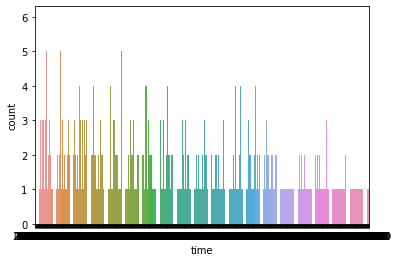

In [25]:
sns.countplot(x="time", data=df)

Text(0, 0.5, 'Weeks')

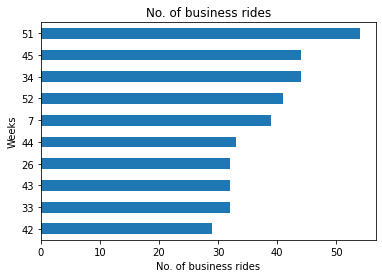

In [26]:
df[df['category']=='Business']['week'].value_counts()[:10].sort_values().plot.barh()
plt.title("No. of business rides")
plt.xlabel("No. of business rides")
plt.ylabel("Weeks")

Text(0, 0.5, 'Weeks')

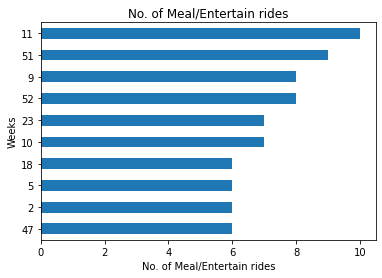

In [27]:
df[df['purpose']=='Meal/Entertain']['week'].value_counts()[:10].sort_values().plot.barh()
plt.title("No. of Meal/Entertain rides")
plt.xlabel("No. of Meal/Entertain rides")
plt.ylabel("Weeks")

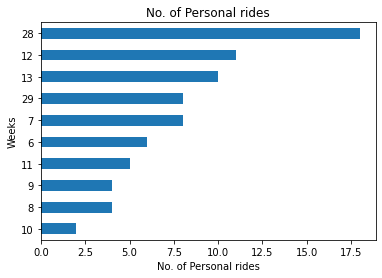

In [28]:
df[df['category']=='Personal']['week'].value_counts()[:10].sort_values().plot.barh()
plt.title("No. of Personal rides")
plt.xlabel("No. of Personal rides")
plt.ylabel("Weeks")
plt.show()

<AxesSubplot:xlabel='month', ylabel='miles'>

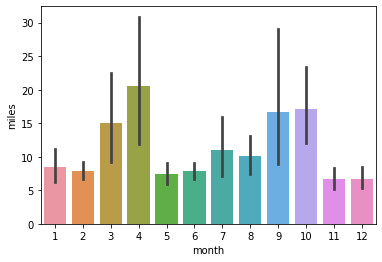

In [29]:
sns.barplot(x="month", y="miles", data=df)

<AxesSubplot:xlabel='count', ylabel='month'>

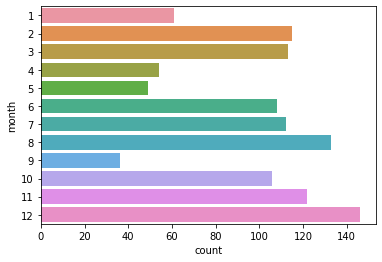

In [30]:
sns.countplot(y="month", data=df)

<AxesSubplot:xlabel='month', ylabel='minutes'>

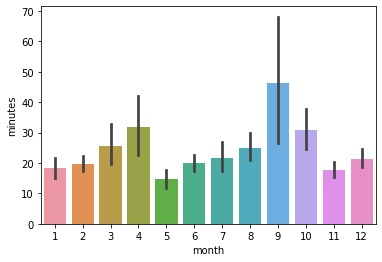

In [31]:
sns.barplot(x="month", y="minutes", data=df)

<AxesSubplot:>

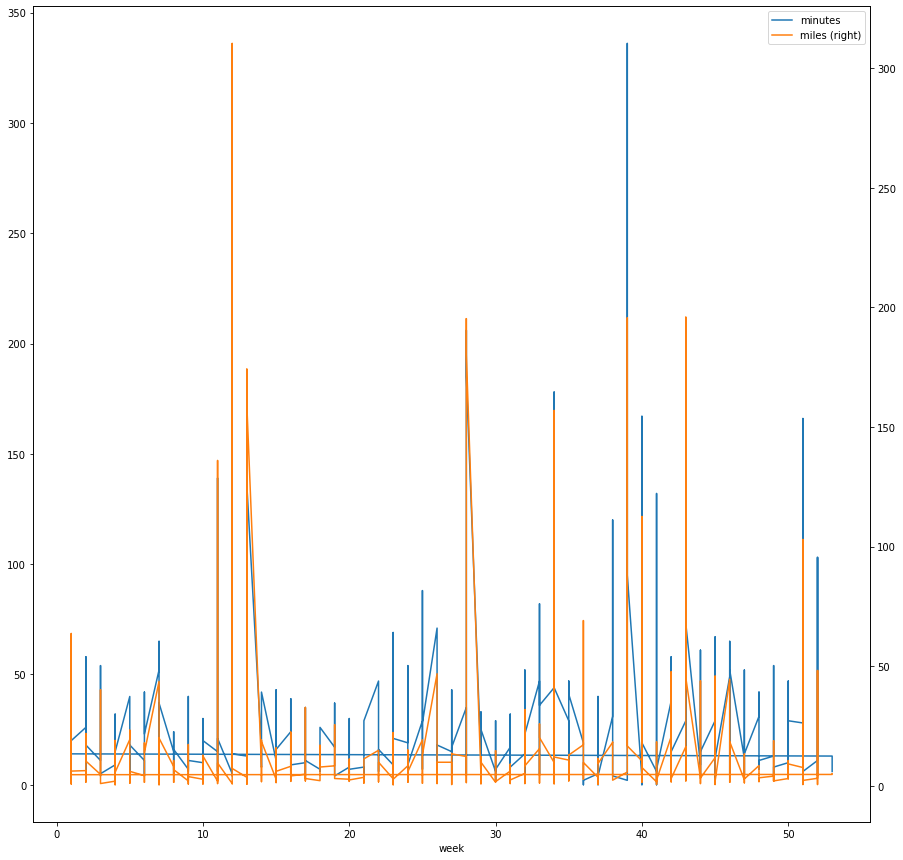

In [32]:
fig_dims=(15,15)
fig,ax = plt.subplots(figsize=fig_dims)
df.plot(x='week', y='minutes', ax=ax)
df.plot(x='week', y='miles', ax=ax, secondary_y=True)

<AxesSubplot:>

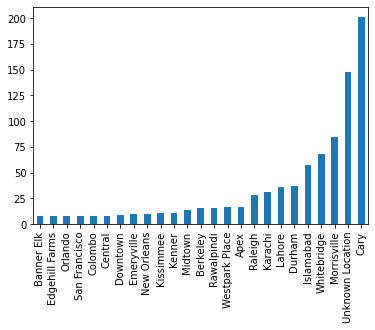

In [33]:
df["start"].value_counts()[:25].sort_values().plot.bar()

<AxesSubplot:>

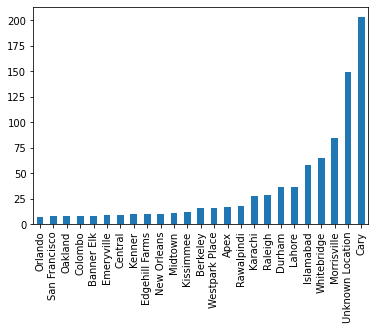

In [34]:
df["stop"].value_counts()[:25].sort_values().plot.bar()

<AxesSubplot:title={'center':'Purpose vs Minutes'}, xlabel='purpose', ylabel='minutes'>

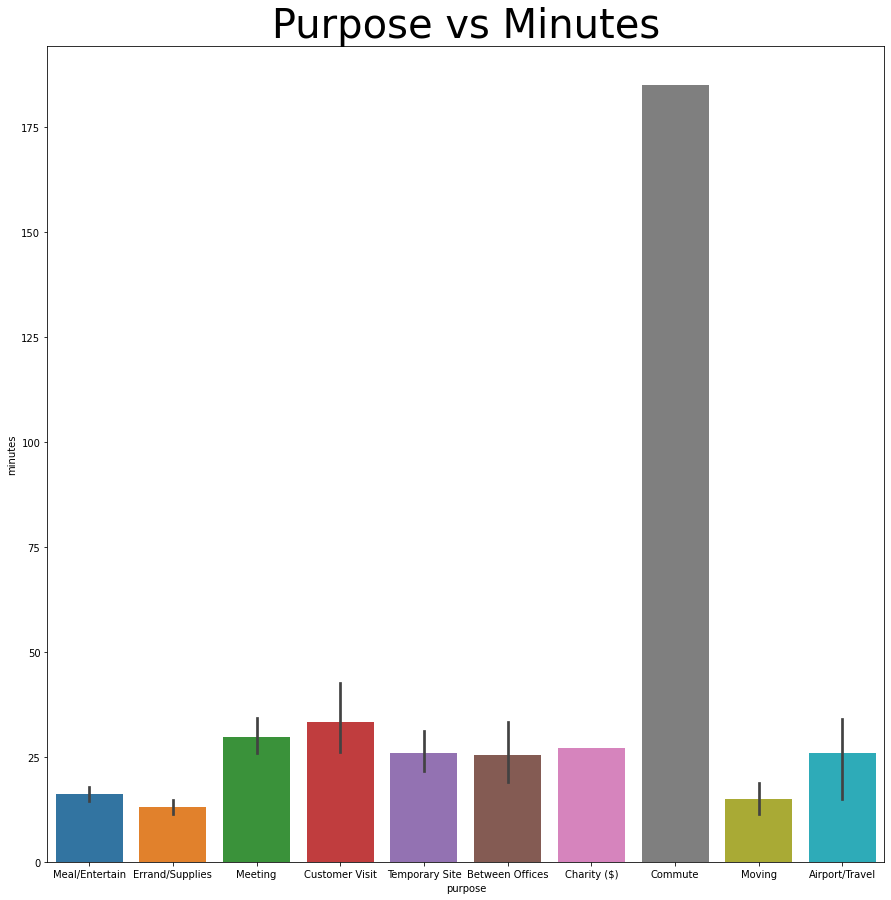

In [56]:
fig_dims=(15,15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.title("Purpose vs Minutes",fontsize=40)
sns.barplot(x='purpose', y='minutes', data=df, ax=ax)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

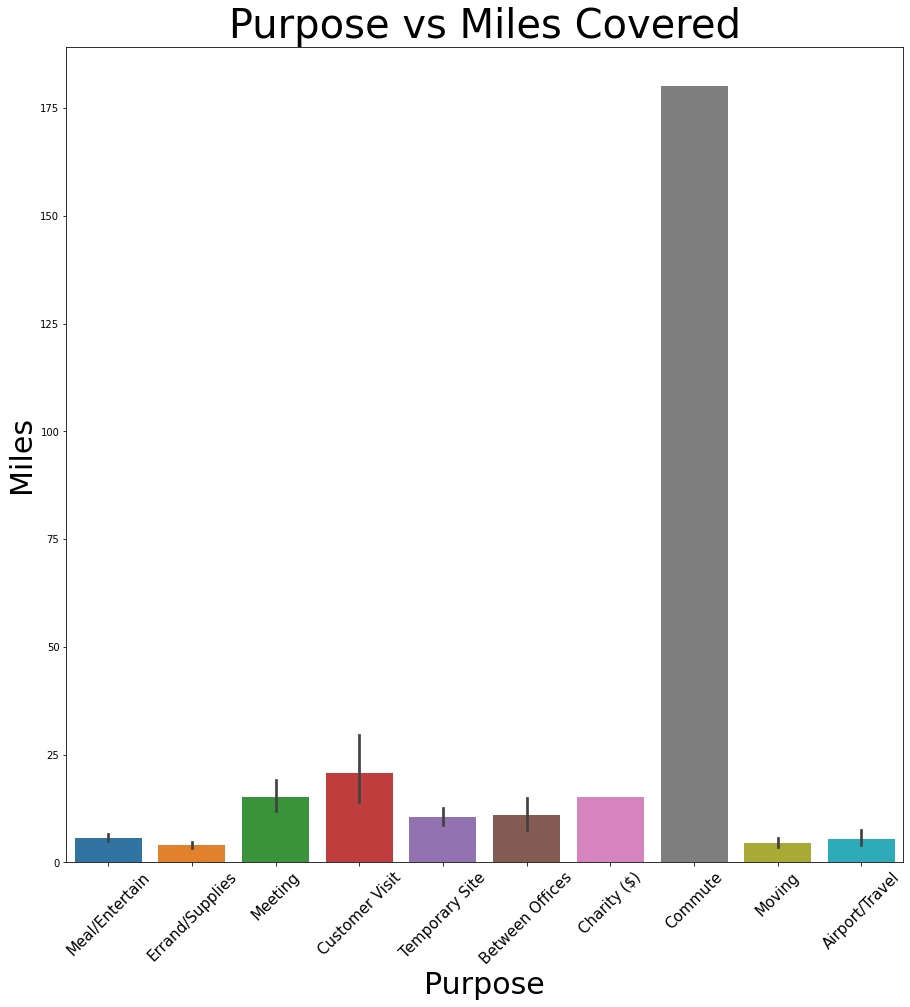

In [36]:
fig_dims=(15,15)
fig, ax=plt.subplots(figsize=fig_dims)
sns.barplot(x='purpose', y= 'miles', data=df, ax=ax)
plt.title("Purpose vs Miles Covered",fontsize=40)
plt.ylabel("Miles",fontsize=30)
plt.xlabel("Purpose",fontsize=30)
plt.xticks(rotation=45, fontsize=15)

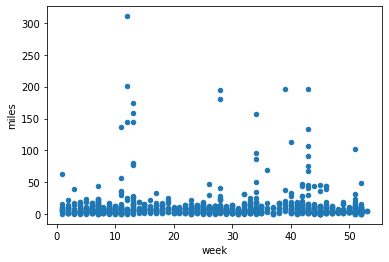

In [37]:
df.plot.scatter(x="week", y="miles");

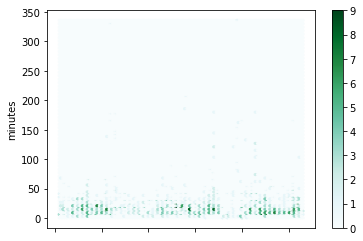

In [38]:
df.plot.hexbin(x="week", y="minutes", gridsize=100);

In [53]:
df1=df[['miles','week','minutes']]

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
y=df1['miles'].values
x=df1.drop(['miles'],axis=1).values

In [42]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=0)
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [43]:
model.score(xtest,ytest)

0.7602945797573923

# Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [45]:
regressor.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [46]:
regressor.score(xtest,ytest)

0.7740030829557918

# Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [55]:
regressor.fit(x, y)

RandomForestRegressor()

In [52]:
regressor.score(xtest,ytest)

0.9567693492305164